<a href="https://colab.research.google.com/github/sibot89/Data-Science/blob/main/Salary_Prediction_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch

In [3]:
from google.colab import files
files.upload()

Saving Salary Data.csv to Salary Data.csv


{'Salary Data.csv': b'Experience Years,Salary\n1.1,39343\n1.2,42774\n1.3,46205\n1.5,37731\n2,43525\n2.2,39891\n2.5,48266\n2.9,56642\n3,60150\n3.2,54445\n3.2,64445\n3.5,60000\n3.7,57189\n3.8,60200\n3.9,63218\n4,55794\n4,56957\n4.1,57081\n4.3,59095\n4.5,61111\n4.7,64500\n4.9,67938\n5.1,66029\n5.3,83088\n5.5,82200\n5.9,81363\n6,93940\n6.2,91000\n6.5,90000\n6.8,91738\n7.1,98273\n7.9,101302\n8.2,113812\n8.5,111620\n8.7,109431\n9,105582\n9.5,116969\n9.6,112635\n10.3,122391\n10.5,121872\n'}

In [4]:
salary = pd.read_csv('Salary Data.csv')
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [5]:
X = salary['Experience Years'].values
y = salary['Salary'].values

In [6]:
type(X), np.shape(X)

(numpy.ndarray, (40,))

Split into train and test; 70% of dataset will be used for training and 30% will be used for test



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    random_state=42, shuffle=True)

In [8]:
X_train.shape

(28,)

In [9]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [10]:
X_train.shape

(28, 1)

Normalization

In [11]:
x_scaler = StandardScaler()
X_train  = x_scaler.fit_transform(X_train)

In [12]:
y_scaler = StandardScaler()
y_train  = y_scaler.fit_transform(y_train)
y_train

array([[-0.58951916],
       [ 1.00291096],
       [ 1.31785584],
       [-0.59145633],
       [-0.71035975],
       [ 0.26283504],
       [-1.3975897 ],
       [ 1.40266508],
       [-1.37635833],
       [-0.59726784],
       [-1.26466118],
       [ 0.63236934],
       [-0.28972294],
       [-1.13173267],
       [ 0.88555728],
       [ 1.60990338],
       [-1.46004401],
       [ 1.16873259],
       [ 0.29723916],
       [ 1.48759055],
       [-0.42505355],
       [-0.36368404],
       [-0.63233059],
       [-0.42292266],
       [-0.72736809],
       [-0.47259166],
       [ 0.56503335],
       [ 1.81996995]])

In [13]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

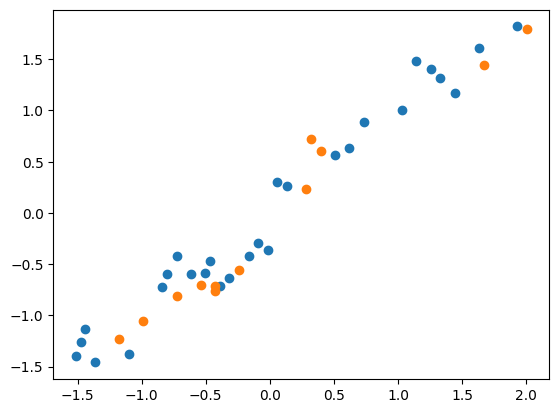

In [14]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test);

Convert NumPy Arrays into Tensors

In [15]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

Implementing Class Linear Regression

In [16]:
class LinearRegression:

  def __init__(self):
    self.theta0 = torch.randn(1)
    self.theta1 = torch.randn(1)

  def __call__(self,x):
    return x * self.theta1 + theta0



In [17]:
def mse(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

We assume that theta0 = 0, now we are gonna find the theta1 so that the loss is minimum

In [28]:
theta0 = 0
theta1_range = torch.linspace(-10, 10, 100)

loss = []
for i, t1 in enumerate(theta1_range):
  y_hat = X_train * t1 + theta0
  loss.append(mse(y_hat, y_train))


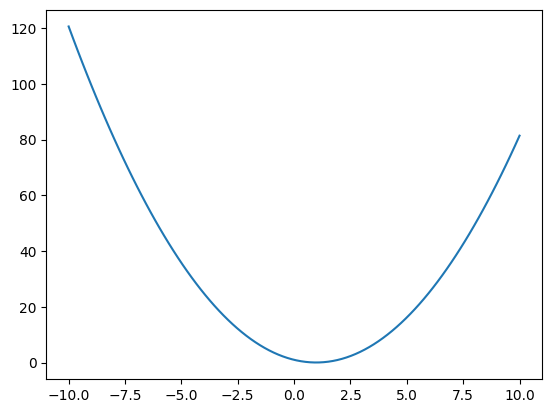

In [29]:
plt.plot(theta1_range, loss)

In [30]:
idx = np.argmin(loss)
theta1 = theta1_range[idx]
theta1

tensor(0.9091)

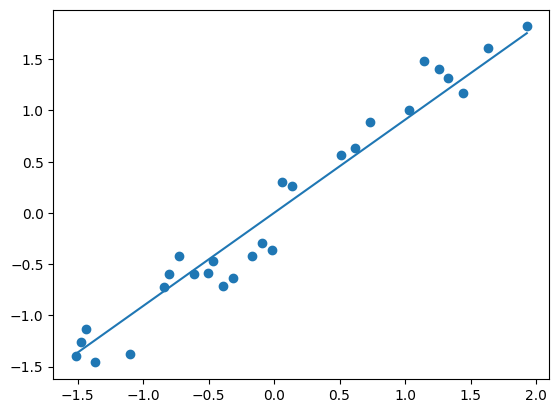

In [34]:
plt.scatter(X_train, y_train)

Xr = torch.linspace(X_train.min(), X_train.max(), 100).unsqueeze(1)
y_hat = Xr * theta1 + theta0
plt.plot(Xr, y_hat)